In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spec_id import Gen_spec, Median_w_Error_cont
import seaborn as sea
import pandas as pd
from glob import glob
from astropy.table import Table
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
np.log10(500E6)

8.6989700043360187

In [2]:
uvjDB = pd.read_pickle('../data/uvj_db.pkl')
gsDB = pd.read_pickle('../data/good_spec_gal_DB.pkl')

In [3]:
len(gsDB[gsDB.agn == False][gsDB.spec == True])

46

In [16]:
qDB = uvjDB[uvjDB['Q/S'] == 'q']

In [17]:
SIDF = pd.read_pickle('../webapp/south_img_DF.pkl')
NIDF = pd.read_pickle('../webapp/north_img_DF.pkl')

In [24]:
SIDF['id'].values

array([17928, 18229, 18761, ..., 50292, 50389, 50425])

In [6]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')

In [7]:
%matplotlib inline

dz=[]
for i in galDB.index:
    z,Pz = np.load('../rshift_dat/%s_hires_Pofz.npy' % galDB['gids'][i])
    med,lerr,herr = Median_w_Error_cont(Pz,z)
    dz.append(((lerr+herr)/2)/(1+med))

In [8]:
np.median(dz)


0.0011921544316850810899

In [9]:
%matplotlib inline

dz=[]
diff=[]
meds=[]
for i in galDB.index:
    z,Pz = np.load('../rshift_dat/%s_hires_Pofz.npy' % galDB['gids'][i])
    z2,Pz2 = np.load('../rshift_dat/%s_t8.7__Pofz.npy' % galDB['gids'][i])

    med,lerr,herr = Median_w_Error_cont(Pz,z)
    med2,lerr2,herr2 = Median_w_Error_cont(Pz2,z2)
    diff.append(galDB['hi_res_specz'][i]-z2[Pz2== max(Pz2)])
    dz.append(((lerr+herr)/2)/(1+galDB['hi_res_specz'][i]))

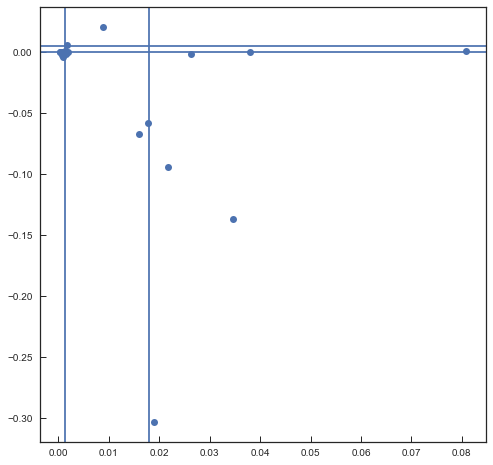

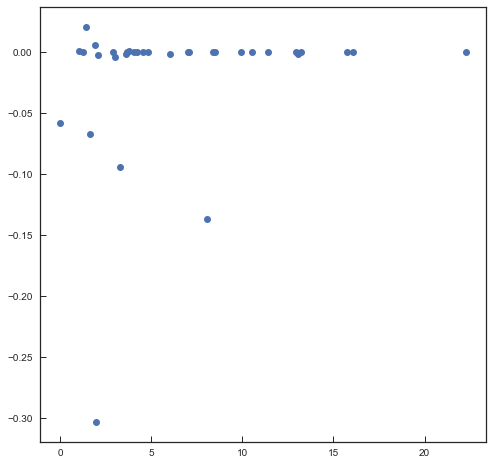

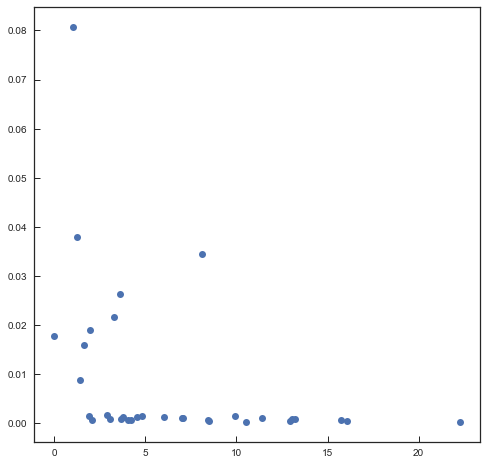

In [10]:
plt.figure(figsize=[8,8])
plt.plot(dz,diff,'o')
plt.axvline(np.median(dz))
plt.axvline(.018)
plt.axhline(np.median(diff))
plt.axhline(0.005)


plt.figure(figsize=[8,8])
plt.plot(galDB['SN'],diff,'o')

plt.figure(figsize=[8,8])
plt.plot(galDB['SN'],dz,'o')

In [29]:
np.median(diff)

0.0

In [47]:
pofzs = glob('../rshift_dat/*t8.7*Pof*')
pofzs_o = glob('../rshift_dat/*hires_*Pof*')

In [52]:
in_dz=[]
out_dz =[]
for i in range(len(pofzs)):
    GID = pofzs[i].split('/')[-1].split('_')[0]
    z,Pz = np.load(pofzs[i])    
    z_o,Pz_o = np.load(pofzs_o[i])

    med,lerr,herr = Median_w_Error_cont(Pz,z)
    if GID in galDB['gids'].values:
#         plt.figure(figsize=[8,8])
#         plt.plot(z,Pz)
#         plt.plot(z_o,Pz_o)
#         plt.axvline(med)
#         plt.title('in sample %s' % GID)
        in_dz.append(((lerr+herr)/2)/(1+med))

    else:
#         plt.figure(figsize=[8,8])
#         plt.plot(z,Pz)
#         plt.plot(z_o,Pz_o)
#         plt.axvline(med)
#         plt.title('out sample %s' % GID)
        out_dz.append(((lerr+herr)/2)/(1+med))
    
    


In [53]:
print np.median(in_dz)
print np.median(out_dz)

0.00138175621215
0.0279742910139
